In [254]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Modificado: Cargar datos
Database=pd.read_csv ('C:/Users/ASUS/Downloads/Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv')
    

# Analisis exploratorio 

In [7]:
Database.head(35)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
Database.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

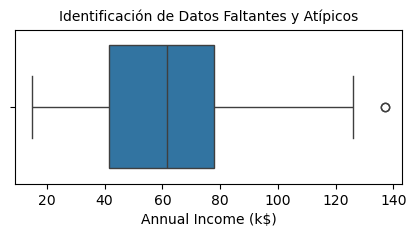

In [19]:
# Modificado: Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(5, 2))
sns.boxplot(x=Database['Annual Income (k$)'])
plt.title('Customized: ' + ('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

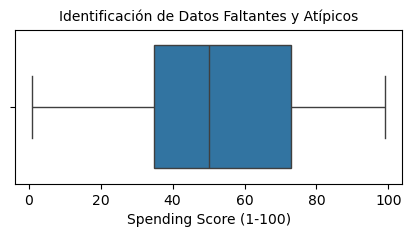

In [21]:
# Modificado: Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(5, 2))
sns.boxplot(x=Database['Spending Score (1-100)'])
plt.title('Customized: ' + ('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

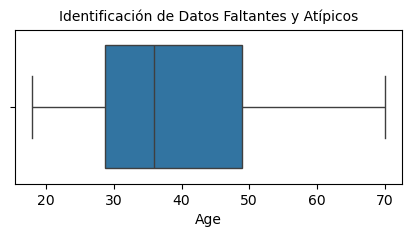

In [23]:
# Modificado: Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(5, 2))
sns.boxplot(x=Database['Age'])
plt.title('Customized: ' + ('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

#  Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [37]:
# Modificado: Revisión de datos faltantes
print("Cantidad de Registros con cero en la cantidad de ingresos anuales del cliente ",Database['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en el puntaje de gasto: ",Database['Spending Score (1-100)'].isin([0]).sum())
print("Cantidad de Registros con cero en la edad: ",Database['Age'].isin([0]).sum())

Cantidad de Registros con cero en la cantidad de ingresos anuales del cliente  0
Cantidad de Registros con cero en el puntaje de gasto:  0
Cantidad de Registros con cero en la edad:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

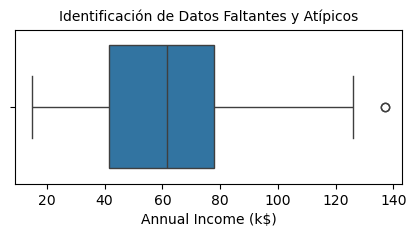

In [41]:
# Modificado: Identificación de Datos  Atípicos
plt.figure(figsize=(5, 2))
sns.boxplot(x=Database['Annual Income (k$)'])
plt.title('Customized: ' + ('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [45]:
# Modificado: Conteo de Datos Atípicos
nivel_minimo=0
nivel_maximo=130
Total_Atipicos=((Database['Annual Income (k$)']<nivel_minimo)|(Database['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [49]:
# Modificado:  Filtra Datos Atípicos

Database=Database[(Database['Annual Income (k$)']<nivel_maximo)&(Database['Annual Income (k$)']>nivel_minimo)]

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

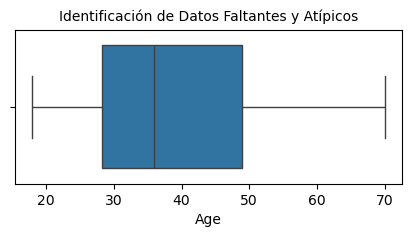

In [53]:
# Modificado: Identificación de Datos Atípicos

plt.figure(figsize=(5, 2))
sns.boxplot(x=Database['Age'])
plt.title('Customized: ' + ('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [55]:
# Modificado: Conteo de Datos Atípicos
nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((Database['Age']<nivel_minimo)|(Database['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [58]:
# Modificado: Revisión del tipo de datos y datos faltantes

Database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
 5   Annual Income (k$)l     198 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.8+ KB


# Seleccion de caracteristicas

Caracteristicas de interes 
- Age
- Annual Income (k$)
- Spending Score (1-100)

In [64]:
# Modificado:  Filtrar columnas del modelo 
Database =Database [["Age", "Annual Income (k$)","Spending Score (1-100)"]]

In [70]:
# Modificado:  Revisión de los datos de las variables objetivo

Database.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


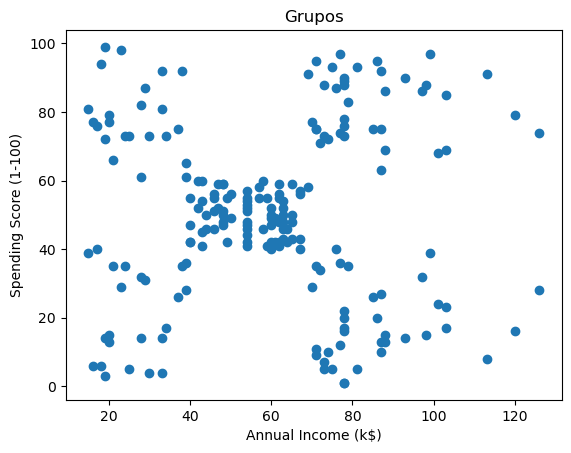

In [77]:
# Modificado:  Grafica antes del agrupamiento

plt.scatter(Database['Annual Income (k$)'], Database['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customized: ' + ('Grupos')
plt.show()

#  Entrenar el modelo configurando los diferentes hiperparámetros

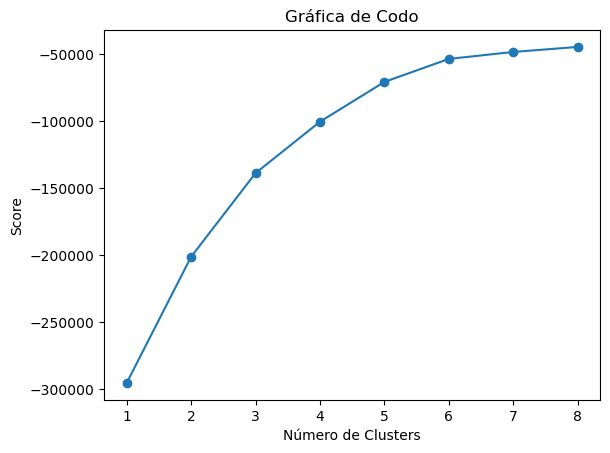

In [225]:
# Modificado: Identificar grafica de codo 
Nc = range(1, 9)
mall_cluster_model = [KMeans(n_clusters=i) for i in Nc]
mall_cluster_model
score = [mall_cluster_model[i].fit(Database).score(Database) for i in range(len(mall_cluster_model))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Customized: ' + ('Gráfica de Codo')
plt.show()

In [242]:
Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(Database)
 

KMeans(n_clusters=6, random_state=0)

In [244]:
Modelo.labels_
Database["Grupo Agr"] = Modelo.labels_ 
print (Database)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo Agr
0     19                  15                      39          2
1     21                  15                      81          5
2     20                  16                       6          2
3     23                  16                      77          5
4     31                  17                      40          2
..   ...                 ...                     ...        ...
193   38                 113                      91          1
194   47                 120                      16          4
195   35                 120                      79          1
196   45                 126                      28          4
197   32                 126                      74          1

[198 rows x 4 columns]


# Evaluación de desempeño

In [262]:
# Modificado:  Preparación de la metrica de la columna Grupo
Observaciones = len(Database)
features_data = Database.drop('Grupo Agr', axis=1)
clusters = Database['Grupo Agr']

# Modificado:  Se calculan las métricas
sil_score = silhouette_score(features_data, clusters)
calinski_score = calinski_harabasz_score(features_data, clusters)
davies_score = davies_bouldin_score(features_data, clusters)
# Modificado:  Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Modificado:  Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         198         |
|  Coeficiente Silhouette  | 0.45985700533290297 |
| Indice Calinski Harabasz | 174.62577034827524  |
|  Indice Davies Bouldin   | 0.7406708421566162  |
+--------------------------+---------------------+


# Graficas

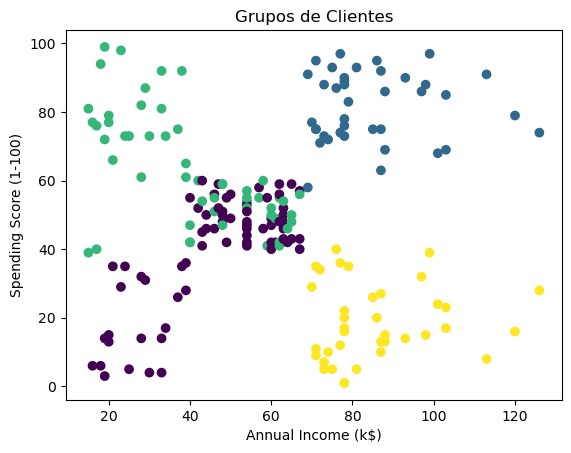

In [194]:
plt.scatter(Database['Annual Income (k$)'], Database['Spending Score (1-100)'], c=Database['Grupo Agr'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customized: ' + ('Grupos de Clientes')
plt.show()

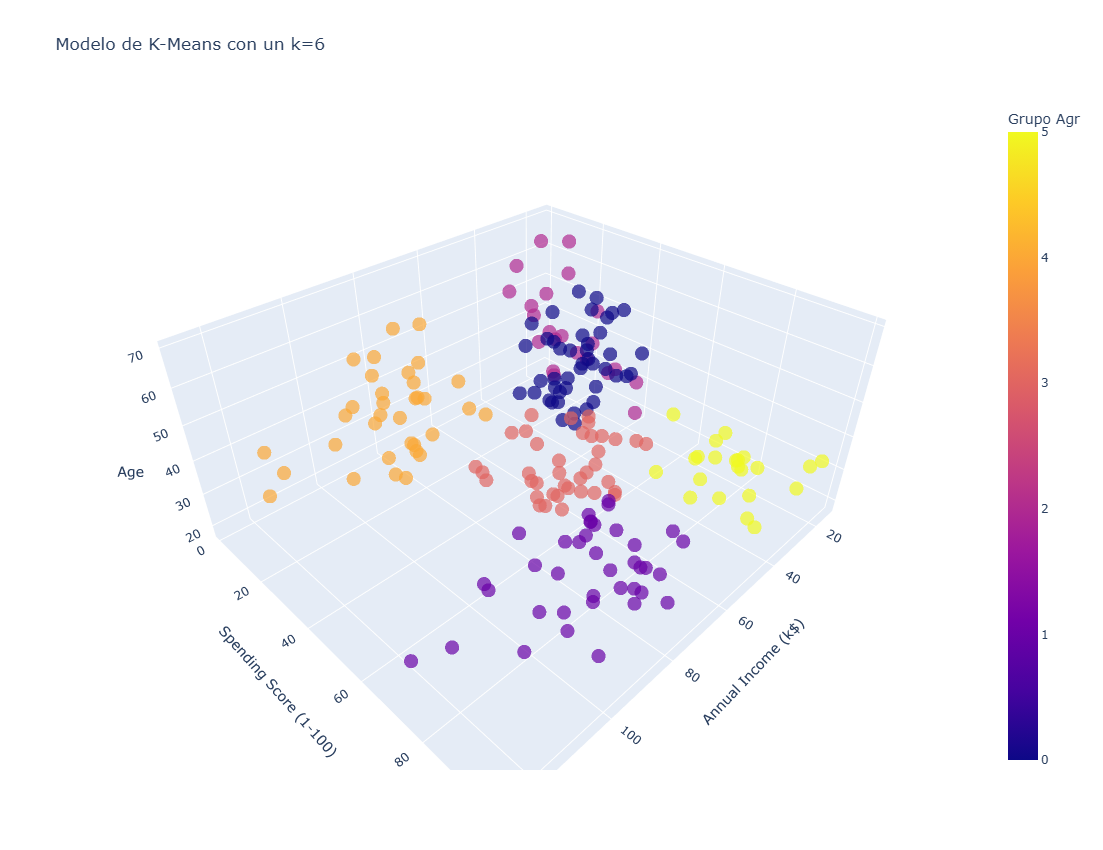

In [250]:
# Modificado:  Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Database, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo Agr', symbol='Grupo Agr', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 